# Análise de Resultados dos Modelos de Churn


## Introdução

Este notebook apresenta a análise e comparação dos resultados obtidos a partir de três modelos de machine learning (Random Forest, MLP e XGBoost) treinados para prever o Churn de clientes.

A avaliação foi realizada utilizando uma abordagem de validação cruzada com 3 folds, onde cada fold foi utilizado como conjunto de teste. Os modelos foram previamente treinados e salvos, e agora serão carregados para a avaliação de sua performance.

Analisaremos as seguintes métricas e visualizações:

Importância das Features: Identificar os principais preditores de Churn.
* Relatório de Classificação: Métricas como precisão, recall e F1-score.
* Curva ROC e AUC: Avaliar a capacidade de discriminação do modelo.
* Estatística KS: Medir a separação entre as distribuições de probabilidade para as classes 'Churn' e 'Não Churn'.
* Matriz de Confusão: Visualizar os acertos e erros de classificação.
* Análise de Quintis: Entender o desempenho do modelo em diferentes faixas de risco (probabilidade de Churn).

## Análise de Performance por Modelo (Cross-Validation)

Nesta seção principal, iteramos sobre cada um dos modelos definidos. Para cada modelo, carregamos os dados e o modelo correspondente a cada fold de teste, calculamos as métricas, geramos os plots e a análise de quintis.
* Modelo 1: Treinado em (2+3), Testado em (1)
* Modelo 2: Treinado em (1+3), Testado em (2)
* Modelo 3: Treinado em (1+2), Testado em (3)

In [1]:
import warnings

# Ignorar warnings específicos
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


🔁 Validação cruzada, observação:

🧠 Modelo: Random Forest

📊 Top 5 Features:


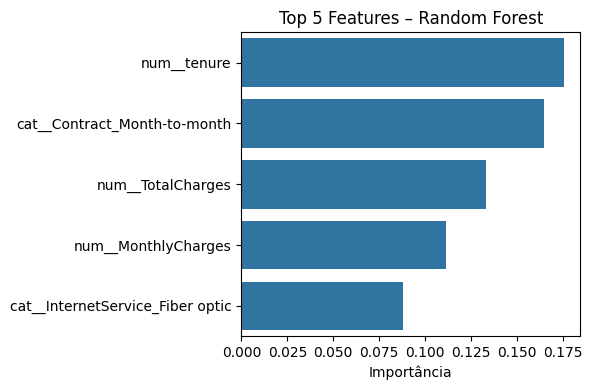


📋 Classification Report – Fold 1
              precision    recall  f1-score   support

           0     0.8379    0.8992    0.8675      2173
           1     0.7638    0.6519    0.7034      1086

    accuracy                         0.8168      3259
   macro avg     0.8008    0.7756    0.7855      3259
weighted avg     0.8132    0.8168    0.8128      3259


📋 Classification Report – Fold 2
              precision    recall  f1-score   support

           0     0.8504    0.9296    0.8882      1449
           1     0.7371    0.5468    0.6279       523

    accuracy                         0.8281      1972
   macro avg     0.7937    0.7382    0.7581      1972
weighted avg     0.8203    0.8281    0.8192      1972


📋 Classification Report – Fold 3
              precision    recall  f1-score   support

           0     0.8576    0.9079    0.8820      1552
           1     0.6957    0.5829    0.6343       561

    accuracy                         0.8216      2113
   macro avg     0.7767   

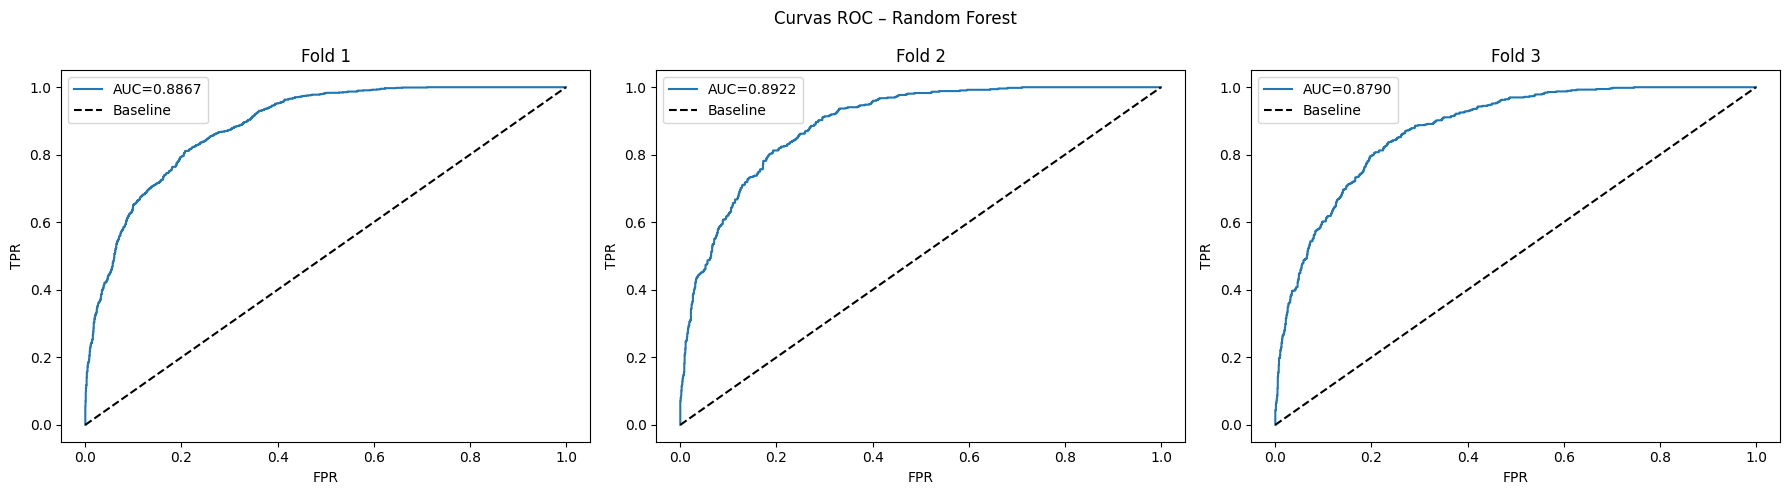


📉 KS:


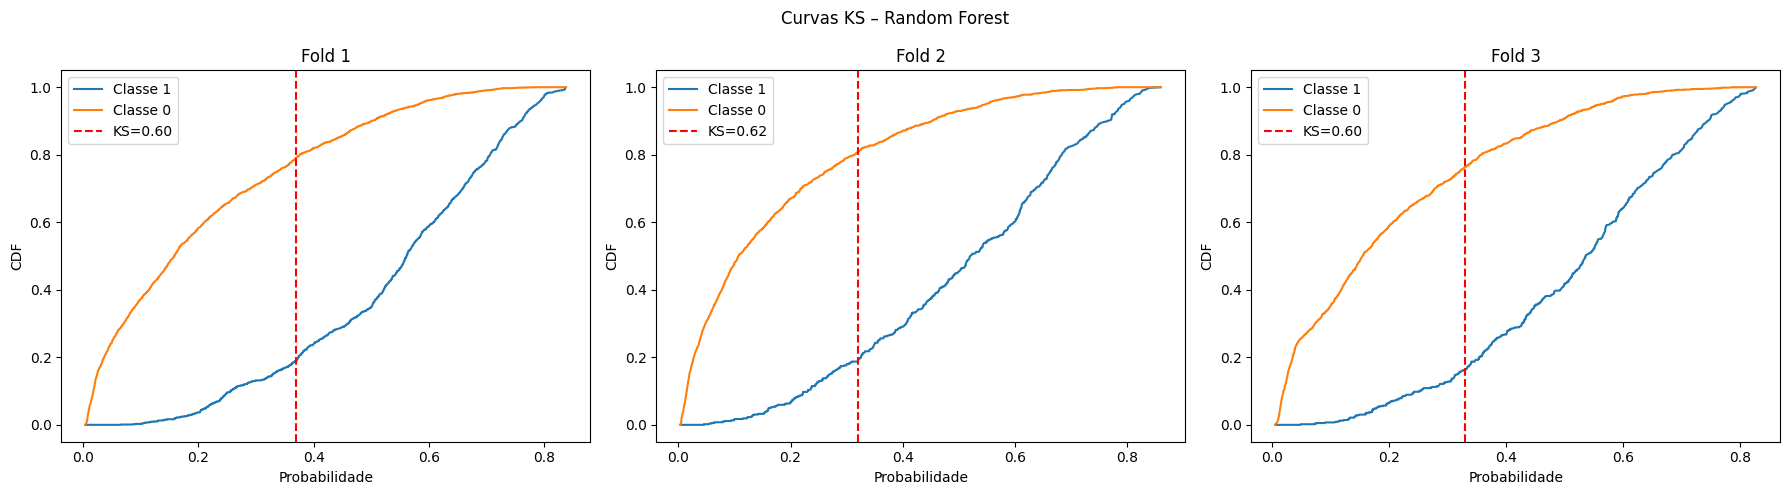


🧾 Matriz de Confusão:


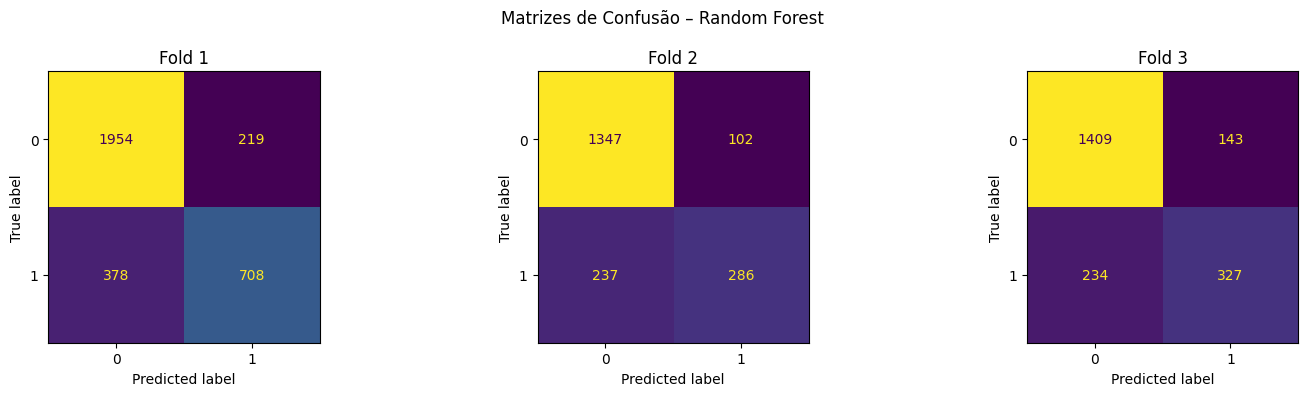

🧠 Modelo: MLP

📊 Top 5 Features:

📋 Classification Report – Fold 1
              precision    recall  f1-score   support

           0     0.8157    0.8780    0.8457      2173
           1     0.7120    0.6031    0.6530      1086

    accuracy                         0.7864      3259
   macro avg     0.7638    0.7406    0.7494      3259
weighted avg     0.7812    0.7864    0.7815      3259


📋 Classification Report – Fold 2
              precision    recall  f1-score   support

           0     0.8394    0.9055    0.8712      1449
           1     0.6650    0.5201    0.5837       523

    accuracy                         0.8032      1972
   macro avg     0.7522    0.7128    0.7274      1972
weighted avg     0.7932    0.8032    0.7949      1972


📋 Classification Report – Fold 3
              precision    recall  f1-score   support

           0     0.8510    0.8756    0.8631      1552
           1     0.6260    0.5758    0.5998       561

    accuracy                         0.7960    

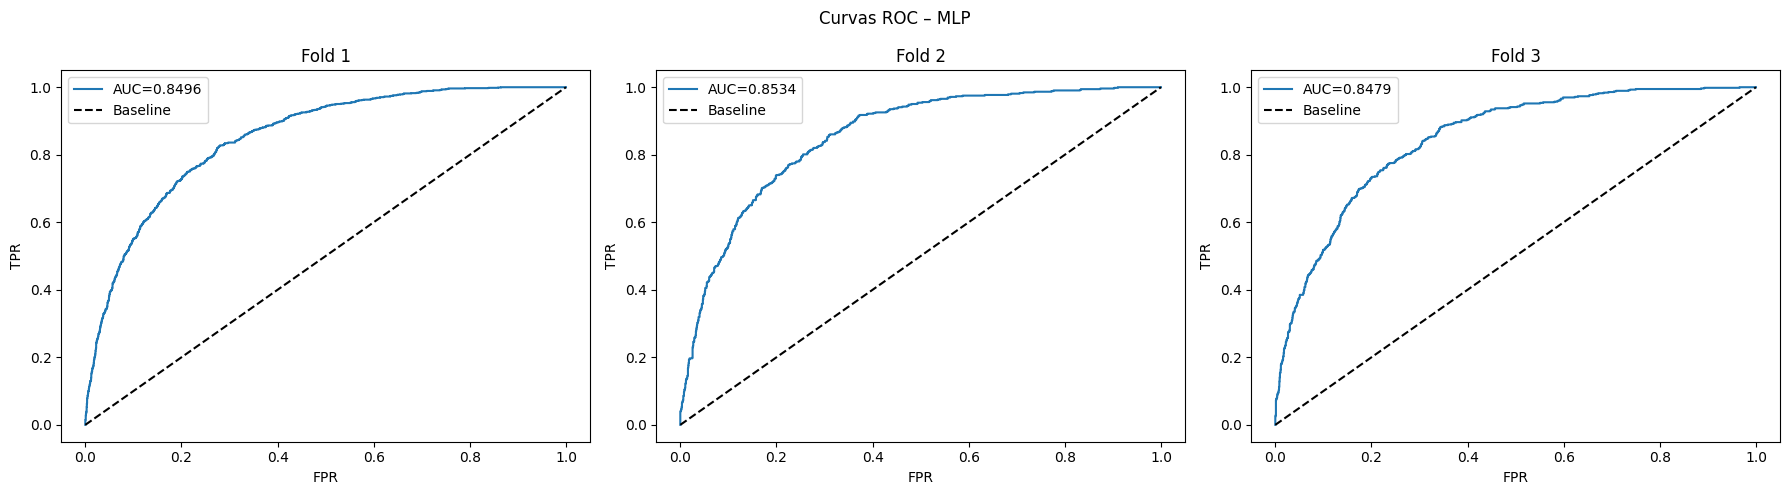


📉 KS:


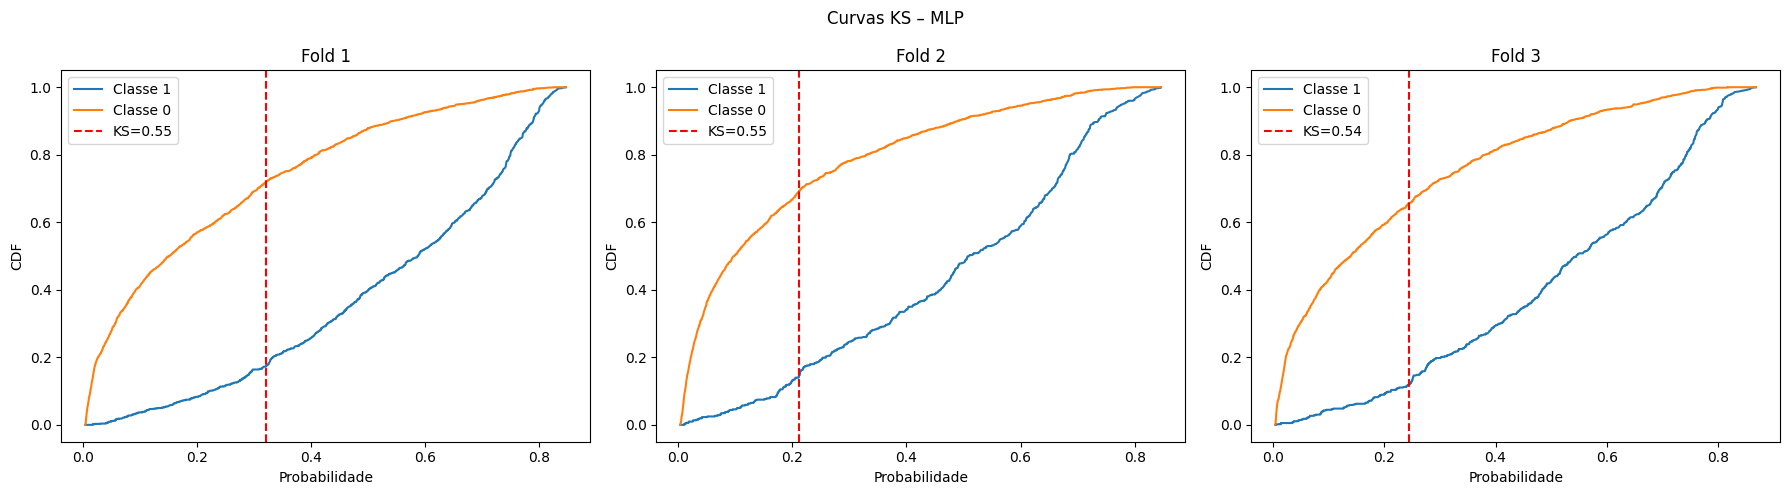


🧾 Matriz de Confusão:


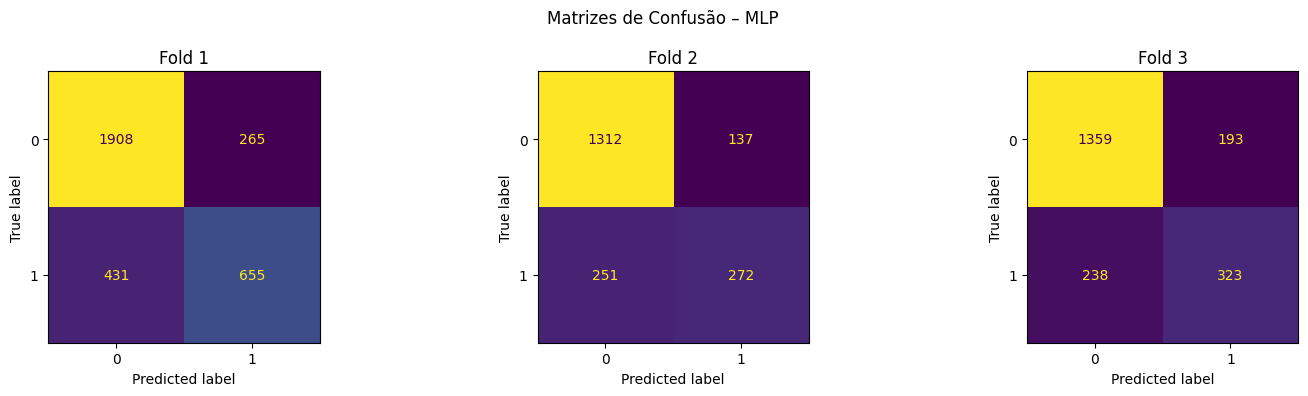

🧠 Modelo: XGBoost

📊 Top 5 Features:


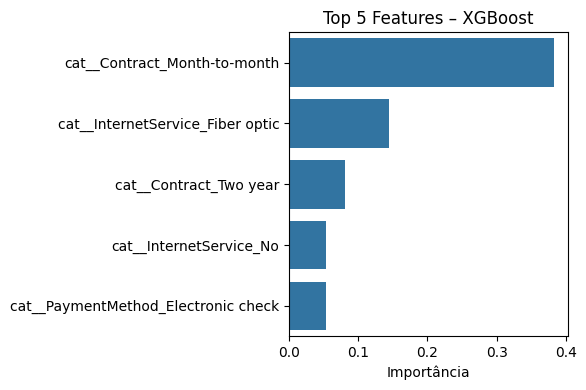


📋 Classification Report – Fold 1
              precision    recall  f1-score   support

           0     0.8393    0.8896    0.8637      2173
           1     0.7490    0.6593    0.7013      1086

    accuracy                         0.8128      3259
   macro avg     0.7941    0.7744    0.7825      3259
weighted avg     0.8092    0.8128    0.8096      3259


📋 Classification Report – Fold 2
              precision    recall  f1-score   support

           0     0.8536    0.9172    0.8842      1449
           1     0.7108    0.5641    0.6290       523

    accuracy                         0.8235      1972
   macro avg     0.7822    0.7406    0.7566      1972
weighted avg     0.8157    0.8235    0.8165      1972


📋 Classification Report – Fold 3
              precision    recall  f1-score   support

           0     0.8599    0.8976    0.8783      1552
           1     0.6775    0.5954    0.6338       561

    accuracy                         0.8173      2113
   macro avg     0.7687   

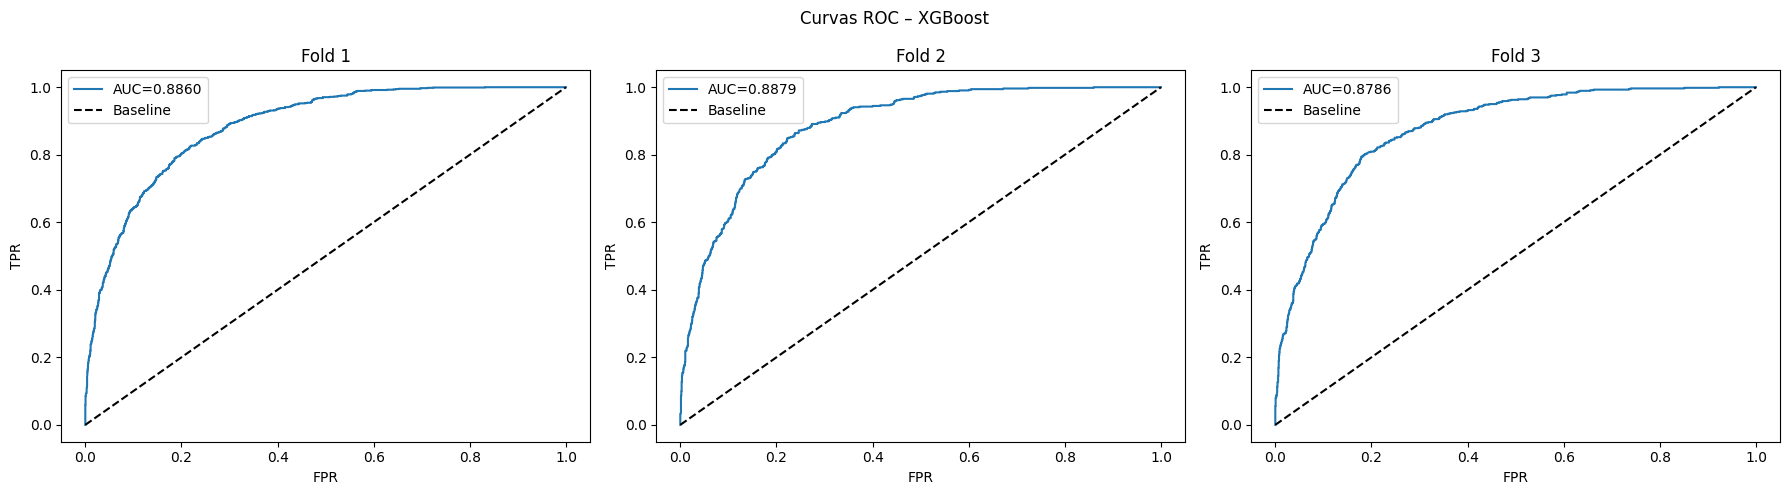


📉 KS:


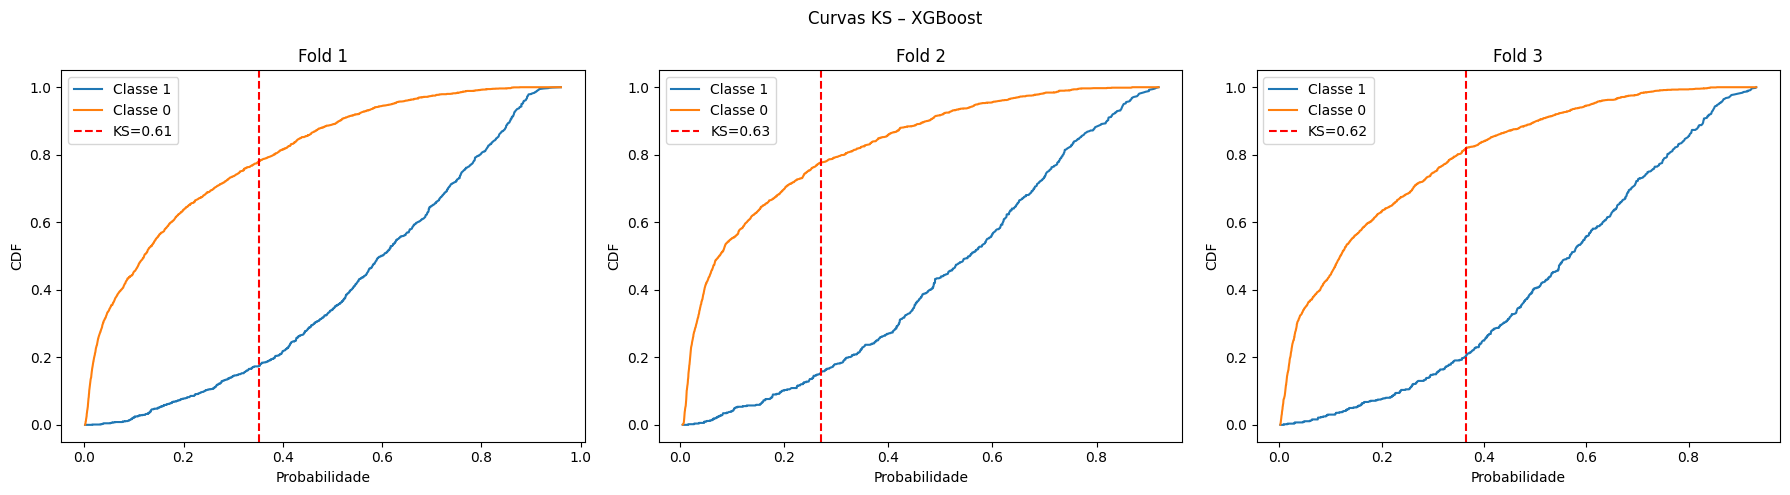


🧾 Matriz de Confusão:


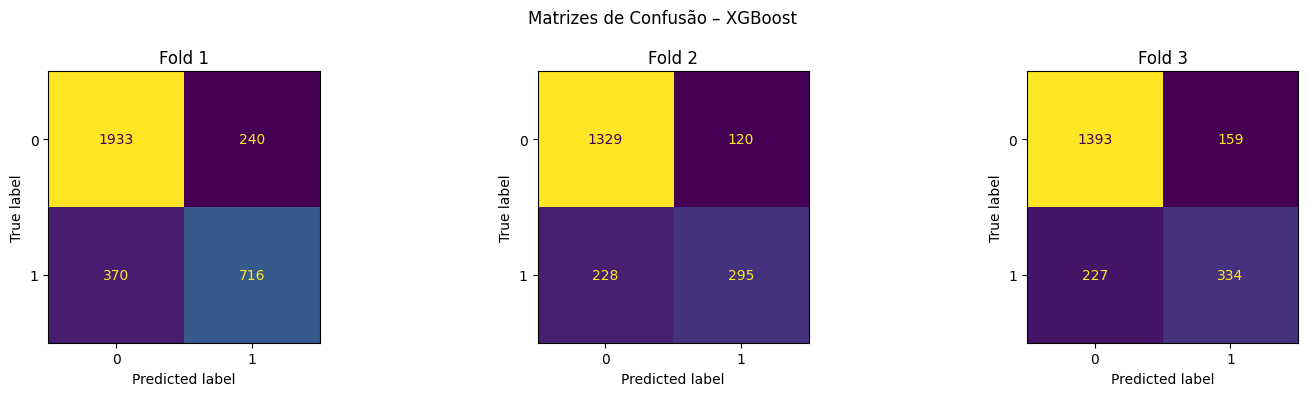

In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_curve,
    auc,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# ============================
# Configurações iniciais
# ============================

MODELS = ["Random Forest", "MLP", "XGBoost"]
N_FOLDS = 3
TARGET = 'Churn'
MODEL_DIR = "../models/"
DATA_DIR = "../data/"
FILE_TEMPLATE = "fold{fold_id}_no_scale.csv"


# ============================
# Funções utilitárias
# ============================

def load_data_and_model(model_name, fold_id):
    model_path = os.path.join(MODEL_DIR, f"{model_name}_fold_{fold_id}_model.joblib")
    data_path = os.path.join(DATA_DIR, FILE_TEMPLATE.format(fold_id=fold_id))

    df = pd.read_csv(data_path)
    df[TARGET] = pd.to_numeric(df[TARGET], errors='coerce').astype(int)
    df.dropna(subset=[TARGET], inplace=True)

    model = joblib.load(model_path)

    return df, model


def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        top_idx = np.argsort(importances)[-5:][::-1]
        plt.figure(figsize=(6, 4))
        sns.barplot(x=importances[top_idx], y=np.array(feature_names)[top_idx])
        plt.title(f"Top 5 Features – {model_name}")
        plt.xlabel("Importância")
        plt.tight_layout()
        plt.show()


def plot_ks(probabilities, y_true, model_name):
    pos_probs = probabilities[y_true == 1]
    neg_probs = probabilities[y_true == 0]
    
    thresholds = np.sort(np.unique(np.concatenate((pos_probs, neg_probs))))
    pos_cdf = [np.mean(pos_probs <= t) for t in thresholds]
    neg_cdf = [np.mean(neg_probs <= t) for t in thresholds]
    
    differences = np.abs(np.array(pos_cdf) - np.array(neg_cdf))
    ks_stat = np.max(differences)
    ks_idx = np.argmax(differences)
    ks_thresh = thresholds[ks_idx]
    
    plt.figure(figsize=(6, 4))
    plt.plot(thresholds, pos_cdf, label='Classe 1')
    plt.plot(thresholds, neg_cdf, label='Classe 0')
    plt.axvline(x=ks_thresh, color='red', linestyle='--', label=f'KS = {ks_stat:.2f}')
    plt.xlabel('Probabilidade predita')
    plt.ylabel('CDF acumulada')
    plt.title(f'KS – {model_name}')
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_roc_all_folds(roc_data, model_name):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for idx, (fold_idx, fpr, tpr, auc_) in enumerate(roc_data):
        axs[idx].plot(fpr, tpr, label=f"AUC={auc_:.4f}")
        axs[idx].plot([0, 1], [0, 1], 'k--', label="Baseline")
        axs[idx].set_title(f"Fold {fold_idx}")
        axs[idx].set_xlabel("FPR")
        axs[idx].set_ylabel("TPR")
        axs[idx].legend()
    plt.suptitle(f"Curvas ROC – {model_name}")
    plt.tight_layout()
    plt.show()


def plot_confusion_matrices(cm_list, model_name):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    for i, cm in enumerate(cm_list):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(ax=axs[i], colorbar=False)
        axs[i].set_title(f"Fold {i+1}")
    plt.suptitle(f"Matrizes de Confusão – {model_name}")
    plt.tight_layout()
    plt.show()


def print_classification_report(y_true, y_pred, fold_id):
    print(f"\n📋 Classification Report – Fold {fold_id}")
    print(classification_report(y_true, y_pred, digits=4))


def plot_ks_all_folds(ks_data, model_name):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    for i, (thresholds, pos_cdf, neg_cdf, ks_thresh, ks_stat) in enumerate(ks_data):
        axs[i].plot(thresholds, pos_cdf, label='Classe 1')
        axs[i].plot(thresholds, neg_cdf, label='Classe 0')
        axs[i].axvline(x=ks_thresh, color='red', linestyle='--', label=f'KS={ks_stat:.2f}')
        axs[i].set_title(f"Fold {i+1}")
        axs[i].set_xlabel('Probabilidade')
        axs[i].set_ylabel('CDF')
        axs[i].legend()
    plt.suptitle(f"Curvas KS – {model_name}")
    plt.tight_layout()
    plt.show()


# ============================
# Execução principal
# ============================

print("🔁 Validação cruzada, observação:\n")

for model_name in MODELS:
    print("="*80)
    print(f"🧠 Modelo: {model_name}")
    print("="*80)
    
    roc_data = []
    cm_data = []
    ks_data = []

    for fold_id in range(1, N_FOLDS + 1):
        df, model = load_data_and_model(model_name, fold_id)
        X = df.drop(columns=[TARGET])
        y = df[TARGET].values
        y_pred = model.predict(X)
        y_proba = model.predict_proba(X)[:, 1]

        # Primeiro fold mostra as features
        if fold_id == 1:
            print("\n📊 Top 5 Features:")
            plot_feature_importance(model, X.columns, model_name)

        # Classification Report
        print_classification_report(y, y_pred, fold_id)

        # ROC
        fpr, tpr, _ = roc_curve(y, y_proba)
        auc_score = auc(fpr, tpr)
        roc_data.append((fold_id, fpr, tpr, auc_score))

        # Confusion Matrix
        cm = confusion_matrix(y, y_pred, labels=[0, 1])
        cm_data.append(cm)

        # KS calculation (stored for final joint plot)
        pos_probs = y_proba[y == 1]
        neg_probs = y_proba[y == 0]
        thresholds = np.sort(np.unique(np.concatenate((pos_probs, neg_probs))))
        pos_cdf = [np.mean(pos_probs <= t) for t in thresholds]
        neg_cdf = [np.mean(neg_probs <= t) for t in thresholds]
        diffs = np.abs(np.array(pos_cdf) - np.array(neg_cdf))
        ks_stat = np.max(diffs)
        ks_idx = np.argmax(diffs)
        ks_thresh = thresholds[ks_idx]
        ks_data.append((thresholds, pos_cdf, neg_cdf, ks_thresh, ks_stat))

    # --- Plots agrupados por modelo ---
    print("\n📈 ROC:")
    plot_roc_all_folds(roc_data, model_name)

    print("\n📉 KS:")
    plot_ks_all_folds(ks_data, model_name)

    print("\n🧾 Matriz de Confusão:")
    plot_confusion_matrices(cm_data, model_name)


In [3]:
model_path = '../models/XGBoost_fold_2_model.joblib'
df_test = pd.read_csv('../data/fold1_no_scale.csv')

target = 'Churn'

df_test[target] = pd.to_numeric(df_test[target], errors='coerce').astype(int)
df_test.dropna(subset=[target], inplace=True)

loaded_model = joblib.load(model_path)

X_churn = df_test.drop(columns=[target])
prediction_probabilities = loaded_model.predict_proba(X_churn)
df_test['predicted_churn_prob'] = prediction_probabilities[:, 1]

num_quintiles = 5
labels = [f'Q{i}' for i in range(1, num_quintiles + 1)]

df_test['Predicted_Prob_Quintile_qcut'] = pd.qcut(
    df_test['predicted_churn_prob'],
    q=num_quintiles,
    labels=labels,
    duplicates='drop'
)

print("--- Resumo por Quintil (Baseado em Quantis - qcut) ---")
summary = df_test.groupby('Predicted_Prob_Quintile_qcut', observed=False).agg(
    Count=('Predicted_Prob_Quintile_qcut', 'size'),
    Actual_Churn_Rate=('Churn', 'mean'),
    Avg_Predicted_Prob=('predicted_churn_prob', 'mean')
).reset_index()

summary['Actual_Churn_Rate'] = summary['Actual_Churn_Rate'].map('{:.2%}'.format)
summary['Avg_Predicted_Prob'] = summary['Avg_Predicted_Prob'].map('{:.2%}'.format)
print(summary)


--- Resumo por Quintil (Baseado em Quantis - qcut) ---
  Predicted_Prob_Quintile_qcut  Count Actual_Churn_Rate Avg_Predicted_Prob
0                           Q1    653             1.99%              1.67%
1                           Q2    651            13.67%              6.92%
2                           Q3    651            27.34%             20.90%
3                           Q4    652            49.39%             43.87%
4                           Q5    652            74.23%             71.23%


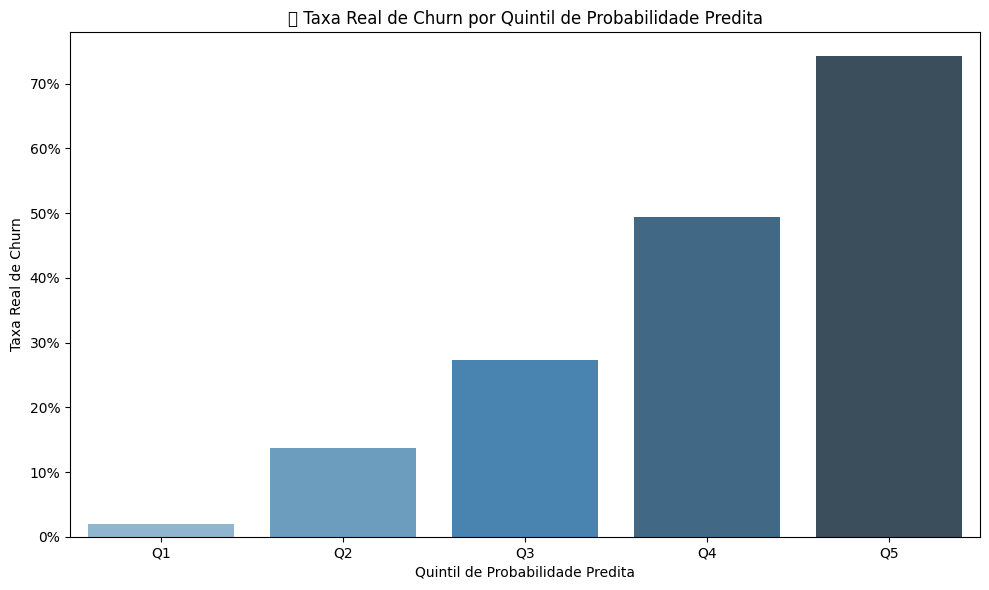

In [4]:
# Convertendo a taxa real de churn de volta para número decimal (caso tenha sido formatado como string)
summary['Actual_Churn_Rate_Num'] = df_test.groupby('Predicted_Prob_Quintile_qcut')['Churn'].mean().values

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='Predicted_Prob_Quintile_qcut', y='Actual_Churn_Rate_Num', palette='Blues_d')

plt.title('📉 Taxa Real de Churn por Quintil de Probabilidade Predita')
plt.xlabel('Quintil de Probabilidade Predita')
plt.ylabel('Taxa Real de Churn')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


In [5]:
model_path = '../models/MLP_fold_2_model.joblib'
df_test = pd.read_csv('../data/fold1.csv')

target = 'Churn'

df_test[target] = pd.to_numeric(df_test[target], errors='coerce').astype(int)
df_test.dropna(subset=[target], inplace=True)

loaded_model = joblib.load(model_path)

X_churn = df_test.drop(columns=[target])
prediction_probabilities = loaded_model.predict_proba(X_churn)
df_test['predicted_churn_prob'] = prediction_probabilities[:, 1]

num_quintiles = 5
labels = [f'Q{i}' for i in range(1, num_quintiles + 1)]

df_test['Predicted_Prob_Quintile_qcut'] = pd.qcut(
    df_test['predicted_churn_prob'],
    q=num_quintiles,
    labels=labels,
    duplicates='drop'
)

print("--- Resumo por Quintil  ---")
summary = df_test.groupby('Predicted_Prob_Quintile_qcut', observed=False).agg(
    Count=('Predicted_Prob_Quintile_qcut', 'size'),
    Actual_Churn_Rate=('Churn', 'mean'),
    Avg_Predicted_Prob=('predicted_churn_prob', 'mean')
).reset_index()

summary['Actual_Churn_Rate'] = summary['Actual_Churn_Rate'].map('{:.2%}'.format)
summary['Avg_Predicted_Prob'] = summary['Avg_Predicted_Prob'].map('{:.2%}'.format)
print(summary)


--- Resumo por Quintil  ---
  Predicted_Prob_Quintile_qcut  Count Actual_Churn_Rate Avg_Predicted_Prob
0                           Q1    652             3.07%              1.84%
1                           Q2    652            12.12%              8.33%
2                           Q3    651            26.73%             22.28%
3                           Q4    652            48.31%             42.87%
4                           Q5    652            76.38%             67.91%


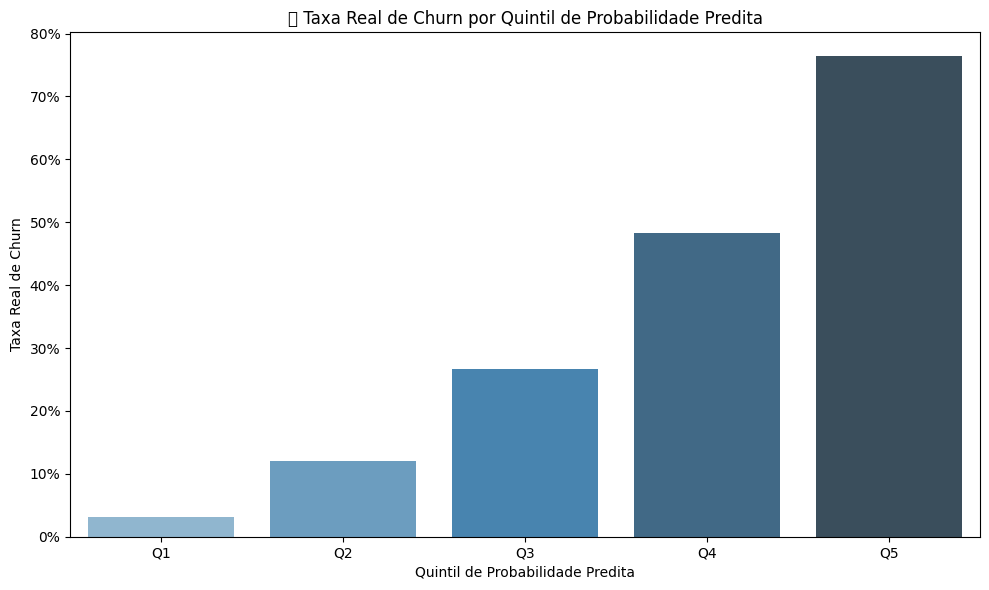

In [6]:
# Convertendo a taxa real de churn de volta para número decimal (caso tenha sido formatado como string)
summary['Actual_Churn_Rate_Num'] = df_test.groupby('Predicted_Prob_Quintile_qcut')['Churn'].mean().values

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='Predicted_Prob_Quintile_qcut', y='Actual_Churn_Rate_Num', palette='Blues_d')

plt.title('📉 Taxa Real de Churn por Quintil de Probabilidade Predita')
plt.xlabel('Quintil de Probabilidade Predita')
plt.ylabel('Taxa Real de Churn')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


In [7]:
model_path = '../models/Random Forest_fold_2_model.joblib'
df_test = pd.read_csv('../data/fold1_no_scale.csv')

target = 'Churn'

df_test[target] = pd.to_numeric(df_test[target], errors='coerce').astype(int)
df_test.dropna(subset=[target], inplace=True)

loaded_model = joblib.load(model_path)

X_churn = df_test.drop(columns=[target])
prediction_probabilities = loaded_model.predict_proba(X_churn)
df_test['predicted_churn_prob'] = prediction_probabilities[:, 1]

num_quintiles = 5
labels = [f'Q{i}' for i in range(1, num_quintiles + 1)]

df_test['Predicted_Prob_Quintile_qcut'] = pd.qcut(
    df_test['predicted_churn_prob'],
    q=num_quintiles,
    labels=labels,
    duplicates='drop'
)

print("--- Resumo por Quintil  ---")
summary = df_test.groupby('Predicted_Prob_Quintile_qcut', observed=False).agg(
    Count=('Predicted_Prob_Quintile_qcut', 'size'),
    Actual_Churn_Rate=('Churn', 'mean'),
    Avg_Predicted_Prob=('predicted_churn_prob', 'mean')
).reset_index()

summary['Actual_Churn_Rate'] = summary['Actual_Churn_Rate'].map('{:.2%}'.format)
summary['Avg_Predicted_Prob'] = summary['Avg_Predicted_Prob'].map('{:.2%}'.format)
print(summary)


--- Resumo por Quintil  ---
  Predicted_Prob_Quintile_qcut  Count Actual_Churn_Rate Avg_Predicted_Prob
0                           Q1    652             3.07%              2.45%
1                           Q2    652            11.66%             10.09%
2                           Q3    652            28.37%             22.82%
3                           Q4    651            50.54%             42.20%
4                           Q5    652            73.01%             66.50%


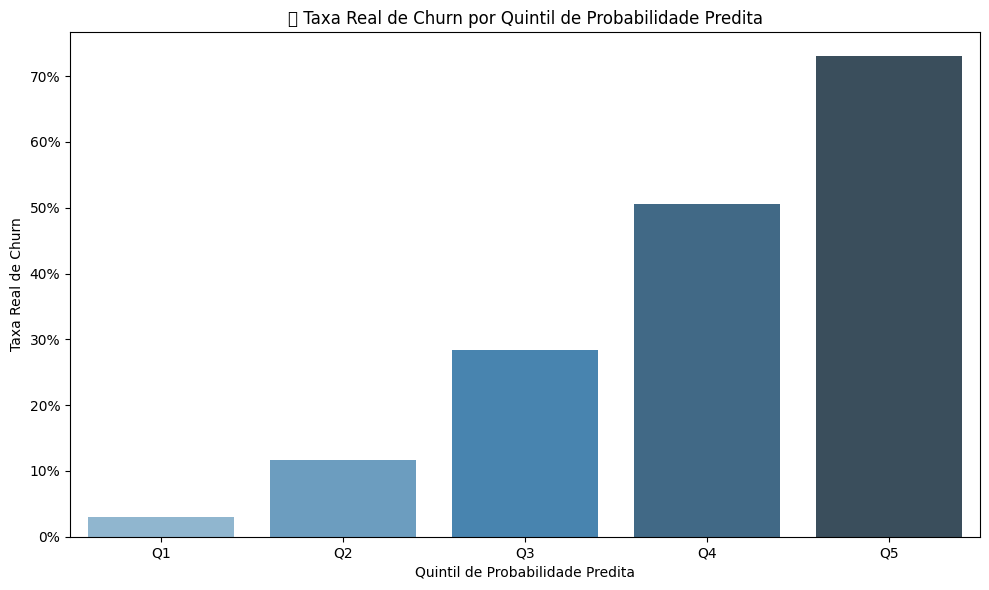

In [8]:
# Convertendo a taxa real de churn de volta para número decimal (caso tenha sido formatado como string)
summary['Actual_Churn_Rate_Num'] = df_test.groupby('Predicted_Prob_Quintile_qcut')['Churn'].mean().values

plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='Predicted_Prob_Quintile_qcut', y='Actual_Churn_Rate_Num', palette='Blues_d')

plt.title('📉 Taxa Real de Churn por Quintil de Probabilidade Predita')
plt.xlabel('Quintil de Probabilidade Predita')
plt.ylabel('Taxa Real de Churn')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()


## Conclusão

A análise comparativa dos modelos de previsão de Churn revelou um desempenho robusto e consistente entre as abordagens testadas. O XGBoost destacou-se como o modelo com a melhor performance média, tanto em termos de AUC (Área Sob a Curva ROC) quanto da estatística KS, indicando uma excelente capacidade de discriminação entre clientes propensos e não propensos ao Churn. É importante notar que o Random Forest apresentou resultados muito próximos, posicionando-se como uma alternativa igualmente forte.

Um ponto crucial observado foi a estabilidade da performance de todos os modelos (XGBoost, Random Forest e MLP) ao longo dos diferentes folds da validação cruzada. Essa consistência sugere que os modelos são generalizáveis e não excessivamente sensíveis a partições específicas dos dados, aumentando a confiança em sua aplicabilidade prática.

Adicionalmente, a análise de quintis validou a capacidade preditiva dos modelos de forma eficaz. Conforme esperado, os clientes foram segmentados corretamente de acordo com o risco: o quintil Q1 (menor probabilidade predita) apresentou a menor taxa de Churn real, enquanto o quintil Q5 (maior probabilidade predita) concentrou a maior incidência de Churn. Isso demonstra a utilidade dos modelos para direcionar ações de retenção de forma estratégica, focando nos clientes de maior risco identificados.

Em suma, tanto XGBoost quanto Random Forest são excelentes candidatos para a implementação de uma solução de previsão de Churn, com o XGBoost apresentando uma ligeira vantagem. A consistência dos resultados e a validação pela análise de quintis reforçam a confiança na capacidade dos modelos em gerar valor para o negócio.